In [52]:
pip install scikit-learn imbalanced-learn

     -------------------------------------- 235.6/235.6 kB 1.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install xgboost

     --------------------------------------- 99.7/99.7 MB 14.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [45]:
pip install catboost


     -------------------------------------- 101.0/101.0 MB 7.0 MB/s eta 0:00:00
     ---------------------------------------- 47.0/47.0 kB 2.3 MB/s eta 0:00:00
     --------------------------------------- 15.6/15.6 MB 13.9 MB/s eta 0:00:00


In [4]:
# importing neccessary libraries
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import sklearn.preprocessing as prs
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from datetime import datetime


In [5]:
# importing the dataset
df = pd.read_csv("C:/Users/18574/Downloads/heart_2022_no_nans.csv")

In [3]:
#Head 
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [4]:
# Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246022 entries, 0 to 246021
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      246022 non-null  object 
 1   Sex                        246022 non-null  object 
 2   GeneralHealth              246022 non-null  object 
 3   PhysicalHealthDays         246022 non-null  float64
 4   MentalHealthDays           246022 non-null  float64
 5   LastCheckupTime            246022 non-null  object 
 6   PhysicalActivities         246022 non-null  object 
 7   SleepHours                 246022 non-null  float64
 8   RemovedTeeth               246022 non-null  object 
 9   HadHeartAttack             246022 non-null  object 
 10  HadAngina                  246022 non-null  object 
 11  HadStroke                  246022 non-null  object 
 12  HadAsthma                  246022 non-null  object 
 13  HadSkinCancer              24

In [5]:
# Checking for missing data
df.isna().sum()

State                        0
Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
LastCheckupTime              0
PhysicalActivities           0
SleepHours                   0
RemovedTeeth                 0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI     

In [6]:
# SUmmary Statistics
df.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000
mean,4.119026,4.167140,7.021331,1.705150,83.615179,28.668136
std,8.405844,8.102687,1.440681,0.106654,21.323156,6.513973
min,0.000000,0.000000,1.000000,0.910000,28.120000,12.020000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.270000
50%,0.000000,0.000000,7.000000,1.700000,81.650000,27.460000
75%,3.000000,4.000000,8.000000,1.780000,95.250000,31.890000
max,30.000000,30.000000,24.000000,2.410000,292.570000,97.650000


In [6]:
# Finding the Outliers
def find_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    lower_outliers = df[(df[column] < lower_bound)]
    upper_outliers = df[(df[column] > upper_bound)]
    return lower_outliers, upper_outliers

outliers_list = []

for col in df.columns:
    if df[col].dtype == 'float64' or df[col].dtype == 'int64':
        lower_outliers, upper_outliers = find_outliers(col)
        if not (lower_outliers.empty and upper_outliers.empty):
            outliers_list.append((col, len(lower_outliers), len(upper_outliers)))

for col, lower_count, upper_count in outliers_list:
    print(f"Column '{col}' has {lower_count} lower bound outliers and {upper_count} upper bound outliers.")
    print()

Column 'PhysicalHealthDays' has 0 lower bound outliers and 38810 upper bound outliers.

Column 'MentalHealthDays' has 0 lower bound outliers and 32714 upper bound outliers.

Column 'SleepHours' has 1303 lower bound outliers and 2185 upper bound outliers.

Column 'HeightInMeters' has 327 lower bound outliers and 503 upper bound outliers.

Column 'WeightInKilograms' has 0 lower bound outliers and 5940 upper bound outliers.

Column 'BMI' has 26 lower bound outliers and 7537 upper bound outliers.



In [7]:
# Handling 'SleepHours' outliers
sleep_lower_threshold = 3 # Minimum plausible sleep hours
sleep_upper_threshold = 12  # Maximum plausible sleep hours
df['SleepHours'] = np.where(df['SleepHours'] < sleep_lower_threshold, sleep_lower_threshold, df['SleepHours'])
df['SleepHours'] = np.where(df['SleepHours'] > sleep_upper_threshold, sleep_upper_threshold, df['SleepHours'])

# Handling 'HeightInMeters' outliers
height_lower_threshold = 1.5  # Minimum plausible height
height_upper_threshold = 2.0  # Maximum plausible height
df['HeightInMeters'] = np.where(df['HeightInMeters'] < height_lower_threshold, height_lower_threshold, df['HeightInMeters'])
df['HeightInMeters'] = np.where(df['HeightInMeters'] > height_upper_threshold, height_upper_threshold, df['HeightInMeters'])

In [8]:
def find_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    lower_outliers = df[(df[column] < lower_bound)]
    upper_outliers = df[(df[column] > upper_bound)]
    return lower_outliers, upper_outliers

outliers_list = []

for col in df.columns:
    if df[col].dtype == 'float64' or df[col].dtype == 'int64':
        lower_outliers, upper_outliers = find_outliers(col)
        if not (lower_outliers.empty and upper_outliers.empty):
            outliers_list.append((col, len(lower_outliers), len(upper_outliers)))

for col, lower_count, upper_count in outliers_list:
    print(f"Column '{col}' has {lower_count} lower bound outliers and {upper_count} upper bound outliers.")
    print()

Column 'PhysicalHealthDays' has 0 lower bound outliers and 38810 upper bound outliers.

Column 'MentalHealthDays' has 0 lower bound outliers and 32714 upper bound outliers.

Column 'SleepHours' has 0 lower bound outliers and 2185 upper bound outliers.

Column 'WeightInKilograms' has 0 lower bound outliers and 5940 upper bound outliers.

Column 'BMI' has 26 lower bound outliers and 7537 upper bound outliers.



In [9]:
# Dropping the State column
df.drop(columns = 'State',inplace = True)

In [11]:
# FInding unique values in dataset
for col in df.columns:
    print(col,':',df[col].unique())

Sex : ['Female' 'Male']
GeneralHealth : ['Very good' 'Fair' 'Good' 'Excellent' 'Poor']
PhysicalHealthDays : [ 4.  0.  5.  3.  2. 25. 30. 15. 29.  8. 16. 20. 10.  9.  7.  1. 21.  6.
 27. 14. 12. 11. 13. 28. 17. 23. 24. 26. 18. 22. 19.]
MentalHealthDays : [ 0. 15.  4. 25.  5. 30. 27.  3.  2.  1. 10. 20. 21.  6.  7.  8. 14.  9.
 12. 18. 29. 28. 17. 11. 16. 13. 26. 22. 24. 19. 23.]
LastCheckupTime : ['Within past year (anytime less than 12 months ago)'
 '5 or more years ago'
 'Within past 2 years (1 year but less than 2 years ago)'
 'Within past 5 years (2 years but less than 5 years ago)']
PhysicalActivities : ['Yes' 'No']
SleepHours : [ 9.  6.  8.  5.  7. 10.  4. 12.  3. 11.]
RemovedTeeth : ['None of them' '6 or more, but not all' '1 to 5' 'All']
HadHeartAttack : ['No' 'Yes']
HadAngina : ['No' 'Yes']
HadStroke : ['No' 'Yes']
HadAsthma : ['No' 'Yes']
HadSkinCancer : ['No' 'Yes']
HadCOPD : ['No' 'Yes']
HadDepressiveDisorder : ['No' 'Yes']
HadKidneyDisease : ['No' 'Yes']
HadArthritis : ['Ye

In [12]:
df.select_dtypes(include=["object"]).nunique()

Sex                           2
GeneralHealth                 5
LastCheckupTime               4
PhysicalActivities            2
RemovedTeeth                  4
HadHeartAttack                2
HadAngina                     2
HadStroke                     2
HadAsthma                     2
HadSkinCancer                 2
HadCOPD                       2
HadDepressiveDisorder         2
HadKidneyDisease              2
HadArthritis                  2
HadDiabetes                   4
DeafOrHardOfHearing           2
BlindOrVisionDifficulty       2
DifficultyConcentrating       2
DifficultyWalking             2
DifficultyDressingBathing     2
DifficultyErrands             2
SmokerStatus                  4
ECigaretteUsage               4
ChestScan                     2
RaceEthnicityCategory         5
AgeCategory                  13
AlcoholDrinkers               2
HIVTesting                    2
FluVaxLast12                  2
PneumoVaxEver                 2
TetanusLast10Tdap             4
HighRisk

In [10]:
X = df.drop('HadHeartAttack',axis = 1)
y = df['HadHeartAttack']

In [11]:
# Split the data with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [12]:
# Identify categorical columns
cat_cols = X_train.select_dtypes(include=['object']).columns

In [13]:
# Apply label encoding to categorical columns in both training and testing sets
le = LabelEncoder()
for col in cat_cols:
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

In [14]:
# Identify numerical columns
num_cols = X_train.select_dtypes(include=['float64', 'int64']).columns

In [15]:
# Standardize numerical columns in the training set
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [16]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [20]:
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train_resampled, y_train_resampled)
y_pred_dt = dt_clf.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
confusion_matrix_dt = confusion_matrix(y_test, y_pred_dt)

print("Decision Tree Accuracy:", accuracy_dt)
print("Decision Tree Confusion Matrix:")
print(confusion_matrix_dt)
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.8857839650442029
Decision Tree Confusion Matrix:
[[42605  3913]
 [ 1707   980]]
Decision Tree Classification Report:
              precision    recall  f1-score   support

          No       0.96      0.92      0.94     46518
         Yes       0.20      0.36      0.26      2687

    accuracy                           0.89     49205
   macro avg       0.58      0.64      0.60     49205
weighted avg       0.92      0.89      0.90     49205



In [21]:
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_resampled, y_train_resampled)
y_pred_rf = rf_clf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Confusion Matrix:")
print(confusion_matrix_rf)
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9298242048572299
Random Forest Confusion Matrix:
[[44683  1835]
 [ 1618  1069]]

Random Forest Classification Report:
              precision    recall  f1-score   support

          No       0.97      0.96      0.96     46518
         Yes       0.37      0.40      0.38      2687

    accuracy                           0.93     49205
   macro avg       0.67      0.68      0.67     49205
weighted avg       0.93      0.93      0.93     49205



In [17]:
le_y = LabelEncoder()
y_train_resampled_encoded = le_y.fit_transform(y_train_resampled)
y_test_encoded = le_y.fit_transform(y_test)

In [18]:
# XGBoost
xgb_model_smote = XGBClassifier(random_state=42)
xgb_model_smote.fit(X_train_resampled, y_train_resampled_encoded)

y_pred_xgb_smote = xgb_model_smote.predict(X_test)
report_xgb_smote = classification_report(y_test_encoded, y_pred_xgb_smote)
conf_matrix_xgb_smote = confusion_matrix(y_test_encoded, y_pred_xgb_smote)

# Print results and confusion matrix for XGBoost
print("XGBoost Model (SMOTE):")
print("Accuracy:", accuracy_score(y_test_encoded, y_pred_xgb_smote))
print("Confusion Matrix:")
print(conf_matrix_xgb_smote)
print("Classification Report:")
print(report_xgb_smote)

XGBoost Model (SMOTE):
Accuracy: 0.9420180875927243
Confusion Matrix:
[[45524   994]
 [ 1859   828]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     46518
           1       0.45      0.31      0.37      2687

    accuracy                           0.94     49205
   macro avg       0.71      0.64      0.67     49205
weighted avg       0.93      0.94      0.94     49205



In [25]:
from sklearn.metrics import precision_recall_curve, auc
# optimal threshold for precision-recall curve with logistic regression model
from numpy import argmax
yhat = xgb_model_smote.predict_proba(X_test)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]
# calculate roc curves
precision, recall, thresholds = precision_recall_curve(y_test_encoded, yhat)
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))

Best Threshold=0.380131, F-Score=0.405


In [24]:
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression

# Gradient Boosting Model
gbm_model = GradientBoostingClassifier(random_state=42)
gbm_model.fit(X_train_resampled, y_train_resampled)

# Evaluate GBM Model
y_pred_gbm = gbm_model.predict(X_test)
conf_matrix_gbm = confusion_matrix(y_test, y_pred_gbm)

# Print results and confusion matrix for GBM
print("Gradient Boosting Model:")
print("Accuracy:", accuracy_score(y_test, y_pred_gbm))
print("Confusion Matrix:")
print(conf_matrix_gbm)
print("Classification Report:")
print(classification_report(y_test, y_pred_gbm))

Gradient Boosting Model:
Accuracy: 0.9022457067371202
Confusion Matrix:
[[42938  3580]
 [ 1230  1457]]
Classification Report:
              precision    recall  f1-score   support

          No       0.97      0.92      0.95     46518
         Yes       0.29      0.54      0.38      2687

    accuracy                           0.90     49205
   macro avg       0.63      0.73      0.66     49205
weighted avg       0.93      0.90      0.92     49205



In [ ]:
# Define the GradientBoostingClassifier
gbm_model = GradientBoostingClassifier()

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=gbm_model, param_grid=param_grid, scoring='accuracy', cv=3)

# Fit the grid search to the data
grid_search.fit(X_train_resampled, y_train_resampled)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_gbm_model = grid_search.best_estimator_

# Evaluate the best model
y_pred_best_gbm = best_gbm_model.predict(X_test)
accuracy_best_gbm = accuracy_score(y_test, y_pred_best_gbm)
confusion_matrix_best_gbm = confusion_matrix(y_test, y_pred_best_gbm)

# Print the evaluation results
print("Best GBM Model Accuracy:", accuracy_best_gbm)
print("Best GBM Model Confusion Matrix:")
print(confusion_matrix_best_gbm)
print("Best GBM Model Classification Report:")
print(classification_report(y_test, y_pred_best_gbm))

In [47]:
# LightGBM Model
lgbm_model = LGBMClassifier(random_state=42)
lgbm_model.fit(X_train_resampled, y_train_resampled)

# Evaluate LightGBM Model
y_pred_lgbm = lgbm_model.predict(X_test)
conf_matrix_lgbm = confusion_matrix(y_test, y_pred_lgbm)

# Print results and confusion matrix for LightGBM
print("LightGBM Model:")
print("Accuracy:", accuracy_score(y_test, y_pred_lgbm))
print("Confusion Matrix:")
print(conf_matrix_lgbm)
print("Classification Report:")
print(classification_report(y_test, y_pred_lgbm))

[LightGBM] [Info] Number of positive: 186069, number of negative: 186069
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.045582 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1623
[LightGBM] [Info] Number of data points in the train set: 372138, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
LightGBM Model:
Accuracy: 0.9428513362463165
Confusion Matrix:
[[45458  1060]
 [ 1752   935]]
Classification Report:
              precision    recall  f1-score   support

          No       0.96      0.98      0.97     46518
         Yes       0.47      0.35      0.40      2687

    accuracy                           0.94     49205
   macro avg       0.72      0.66      0.68     49205
weighted avg       0.94      0.94      0.94     49205



In [30]:
# Define the LightGBM Classifier
lgbm_model = LGBMClassifier()

# Define a smaller hyperparameter grid
param_dist = {
    'num_leaves': [20, 30, 40],
    'learning_rate': [0.01, 0.1],
    'max_depth': [5, 10, 15],
    'n_estimators': [50, 100, 200],
}

# Use RandomizedSearchCV
random_search_lgbm = RandomizedSearchCV(
    estimator=lgbm_model, 
    param_distributions=param_dist, 
    n_iter=10,  # Number of random combinations to try
    scoring='accuracy', 
    cv=3, 
    n_jobs=-1,  # Use all available cores
    random_state=42
)

# Fit the random search to the data
random_search_lgbm.fit(X_train_resampled, y_train_resampled)

# Print the best hyperparameters
print("Best Hyperparameters:", random_search_lgbm.best_params_)

# Get the best model
best_lgbm_model = random_search_lgbm.best_estimator_

# Evaluate the best model
y_pred_best_lgbm = best_lgbm_model.predict(X_test)
accuracy_best_lgbm = accuracy_score(y_test, y_pred_best_lgbm)
confusion_matrix_best_lgbm = confusion_matrix(y_test, y_pred_best_lgbm)

# Print the evaluation results
print("Best LightGBM Model Accuracy:", accuracy_best_lgbm)
print("Best LightGBM Model Confusion Matrix:")
print(confusion_matrix_best_lgbm)
print("Best LightGBM Model Classification Report:")
print(classification_report(y_test, y_pred_best_lgbm))

[LightGBM] [Info] Number of positive: 186069, number of negative: 186069
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.038400 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1623
[LightGBM] [Info] Number of data points in the train set: 372138, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Best Hyperparameters: {'num_leaves': 40, 'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.1}
Best LightGBM Model Accuracy: 0.9445584798292856
Best LightGBM Model Confusion Matrix:
[[45657   861]
 [ 1867   820]]
Best LightGBM Model Classification Report:
              precision    recall  f1-score   support

          No       0.96      0.98      0.97     46518
         Yes       0.49      0.31      0.38      2687

    accuracy                           0.94     49205
   macro avg  

In [25]:
# CatBoost Model
catboost_model = CatBoostClassifier(random_state=42, verbose=0)
catboost_model.fit(X_train_resampled, y_train_resampled)

# Evaluate CatBoost Model
y_pred_catboost = catboost_model.predict(X_test)
conf_matrix_catboost = confusion_matrix(y_test, y_pred_catboost)

# Print results and confusion matrix for CatBoost
print("CatBoost Model:")
print("Accuracy:", accuracy_score(y_test, y_pred_catboost))
print("Confusion Matrix:")
print(conf_matrix_catboost)
print("Classification Report:")
print(classification_report(y_test, y_pred_catboost))

CatBoost Model:
Accuracy: 0.9456559292754801
Confusion Matrix:
[[45810   708]
 [ 1966   721]]
Classification Report:
              precision    recall  f1-score   support

          No       0.96      0.98      0.97     46518
         Yes       0.50      0.27      0.35      2687

    accuracy                           0.95     49205
   macro avg       0.73      0.63      0.66     49205
weighted avg       0.93      0.95      0.94     49205



In [27]:
from catboost import CatBoostClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define the CatBoostClassifier
catboost_model = CatBoostClassifier()

# Define a smaller hyperparameter grid
param_dist = {
    'iterations': [100, 200],
    'learning_rate': [0.01, 0.1],
    'depth': [4, 6],
    'l2_leaf_reg': [1, 3],
}

# Use RandomizedSearchCV instead of GridSearchCV
random_search = RandomizedSearchCV(
    estimator=catboost_model, 
    param_distributions=param_dist, 
    n_iter=10,  # Number of random combinations to try
    scoring='accuracy', 
    cv=3, 
    n_jobs=-1,  # Use all available cores
    random_state=42
)

# Fit the random search to the data
random_search.fit(X_train_resampled, y_train_resampled)

# Print the best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

# Get the best model
best_catboost_model = random_search.best_estimator_

# Evaluate the best model
y_pred_best_catboost = best_catboost_model.predict(X_test)
accuracy_best_catboost = accuracy_score(y_test, y_pred_best_catboost)
confusion_matrix_best_catboost = confusion_matrix(y_test, y_pred_best_catboost)

# Print the evaluation results
print("Best CatBoost Model Accuracy:", accuracy_best_catboost)
print("Best CatBoost Model Confusion Matrix:")
print(confusion_matrix_best_catboost)
print("Best CatBoost Model Classification Report:")
print(classification_report(y_test, y_pred_best_catboost))

0:	learn: 0.6315491	total: 62.1ms	remaining: 12.4s
1:	learn: 0.5929475	total: 108ms	remaining: 10.7s
2:	learn: 0.5615666	total: 149ms	remaining: 9.78s
3:	learn: 0.5364076	total: 192ms	remaining: 9.41s
4:	learn: 0.5137853	total: 235ms	remaining: 9.15s
5:	learn: 0.4920600	total: 283ms	remaining: 9.14s
6:	learn: 0.4790879	total: 327ms	remaining: 9.02s
7:	learn: 0.4683524	total: 371ms	remaining: 8.9s
8:	learn: 0.4559615	total: 419ms	remaining: 8.89s
9:	learn: 0.4472558	total: 471ms	remaining: 8.95s
10:	learn: 0.4409347	total: 523ms	remaining: 8.99s
11:	learn: 0.4350949	total: 571ms	remaining: 8.95s
12:	learn: 0.4177639	total: 628ms	remaining: 9.03s
13:	learn: 0.4126196	total: 686ms	remaining: 9.11s
14:	learn: 0.3870241	total: 738ms	remaining: 9.11s
15:	learn: 0.3560393	total: 798ms	remaining: 9.18s
16:	learn: 0.3435706	total: 852ms	remaining: 9.17s
17:	learn: 0.3403671	total: 910ms	remaining: 9.2s
18:	learn: 0.3244254	total: 980ms	remaining: 9.33s
19:	learn: 0.3154601	total: 1.04s	remainin

In [51]:
# Logistic Regression Model with increased max_iter
logreg_model = LogisticRegression(random_state=42, max_iter=1000)
logreg_model.fit(X_train_resampled, y_train_resampled)

# Evaluate Logistic Regression Model
y_pred_logreg = logreg_model.predict(X_test)
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)

# Print results and confusion matrix for Logistic Regression
print("Logistic Regression Model:")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Confusion Matrix:")
print(conf_matrix_logreg)
print("Classification Report:")
print(classification_report(y_test, y_pred_logreg))

Logistic Regression Model:
Accuracy: 0.8040443044406056
Confusion Matrix:
[[37807  8711]
 [  931  1756]]
Classification Report:
              precision    recall  f1-score   support

          No       0.98      0.81      0.89     46518
         Yes       0.17      0.65      0.27      2687

    accuracy                           0.80     49205
   macro avg       0.57      0.73      0.58     49205
weighted avg       0.93      0.80      0.85     49205



In [32]:
# Define the Logistic Regression model
logreg_model = LogisticRegression(random_state=42)

# Define a hyperparameter grid
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(
    estimator=logreg_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    n_jobs=-1,
    verbose=2
)

# Fit the grid search to the data
grid_search.fit(X_train_resampled, y_train_resampled)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_logreg_model = grid_search.best_estimator_

# Evaluate the best model
y_pred_best_logreg = best_logreg_model.predict(X_test)
accuracy_best_logreg = accuracy_score(y_test, y_pred_best_logreg)
confusion_matrix_best_logreg = confusion_matrix(y_test, y_pred_best_logreg)

# Print the evaluation results
print("Best Logistic Regression Model Accuracy:", accuracy_best_logreg)
print("Best Logistic Regression Model Confusion Matrix:")
print(confusion_matrix_best_logreg)
print("Best Logistic Regression Model Classification Report:")
print(classification_report(y_test, y_pred_best_logreg))

Fitting 3 folds for each of 12 candidates, totalling 36 fits


C:\Users\18574\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
18 fits failed out of a total of 36.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\18574\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\18574\anaconda3\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\18574\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1169, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)

Best Hyperparameters: {'C': 10, 'penalty': 'l2'}
Best Logistic Regression Model Accuracy: 0.8040239813027131
Best Logistic Regression Model Confusion Matrix:
[[37806  8712]
 [  931  1756]]
Best Logistic Regression Model Classification Report:
              precision    recall  f1-score   support

          No       0.98      0.81      0.89     46518
         Yes       0.17      0.65      0.27      2687

    accuracy                           0.80     49205
   macro avg       0.57      0.73      0.58     49205
weighted avg       0.93      0.80      0.85     49205



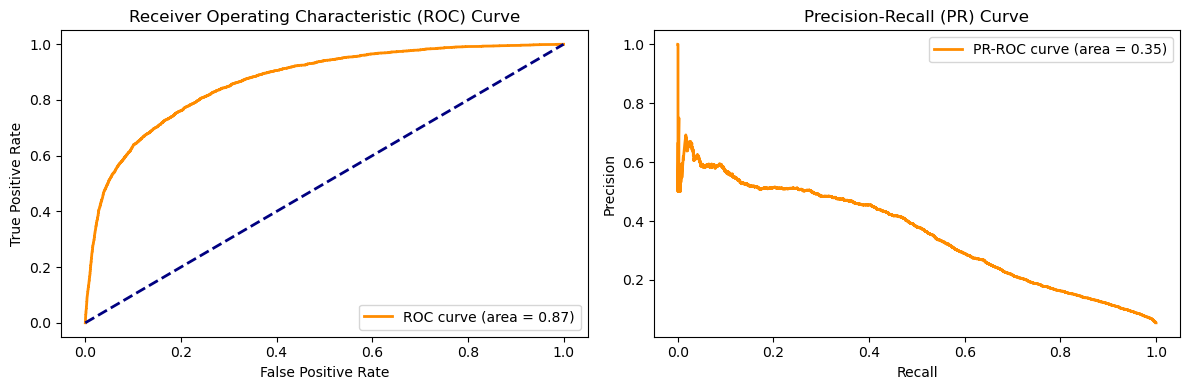

In [53]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Convert labels to binary format
y_test_binary = label_binarize(y_test, classes=['No', 'Yes'])

# Function to plot ROC and PR-ROC curves
def plot_roc_pr_curves(model, X_test, y_test):
    # Predict probabilities
    y_probs = model.predict_proba(X_test)[:, 1]

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test_binary, y_probs)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')

    # PR-ROC Curve
    precision, recall, _ = precision_recall_curve(y_test_binary, y_probs)
    pr_auc = auc(recall, precision)

    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, color='darkorange', lw=2, label='PR-ROC curve (area = {:.2f})'.format(pr_auc))
    plt.title('Precision-Recall (PR) Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

# Plot ROC and PR-ROC curves for CatBoost model
plot_roc_pr_curves(catboost_model, X_test, y_test)

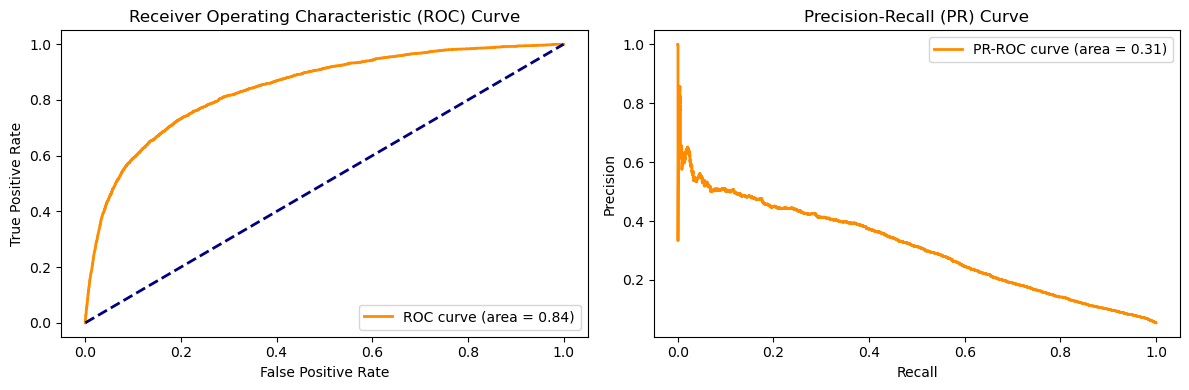

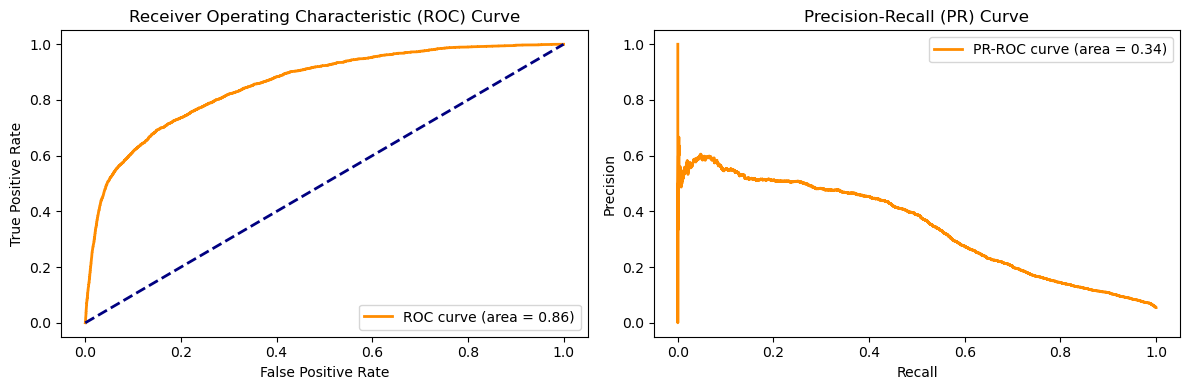

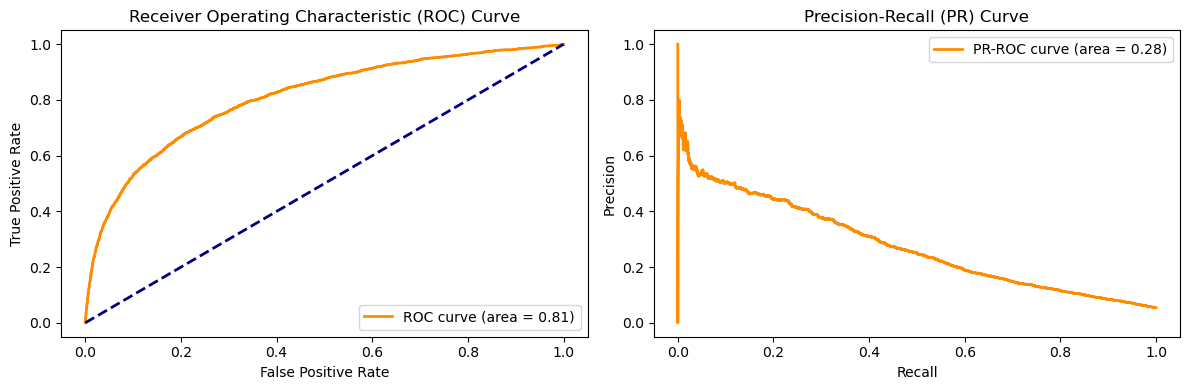

In [58]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt

# Function to plot ROC and PR-ROC curves
def plot_roc_pr_curves(model, X_test, y_test):
    # Predict probabilities
    if hasattr(model, 'predict_proba'):
        y_probs = model.predict_proba(X_test)[:, 1]
    else:
        y_probs = model.decision_function(X_test)

    # Convert labels to binary format
    y_test_binary = label_binarize(y_test, classes=['No', 'Yes'])

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test_binary, y_probs)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')

    # PR-ROC Curve
    precision, recall, _ = precision_recall_curve(y_test_binary, y_probs)
    pr_auc = auc(recall, precision)

    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, color='darkorange', lw=2, label='PR-ROC curve (area = {:.2f})'.format(pr_auc))
    plt.title('Precision-Recall (PR) Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

# Plot ROC and PR-ROC curves for other models
plot_roc_pr_curves(gbm_model, X_test, y_test)
plot_roc_pr_curves(lgbm_model, X_test, y_test)
plot_roc_pr_curves(logreg_model, X_test, y_test)

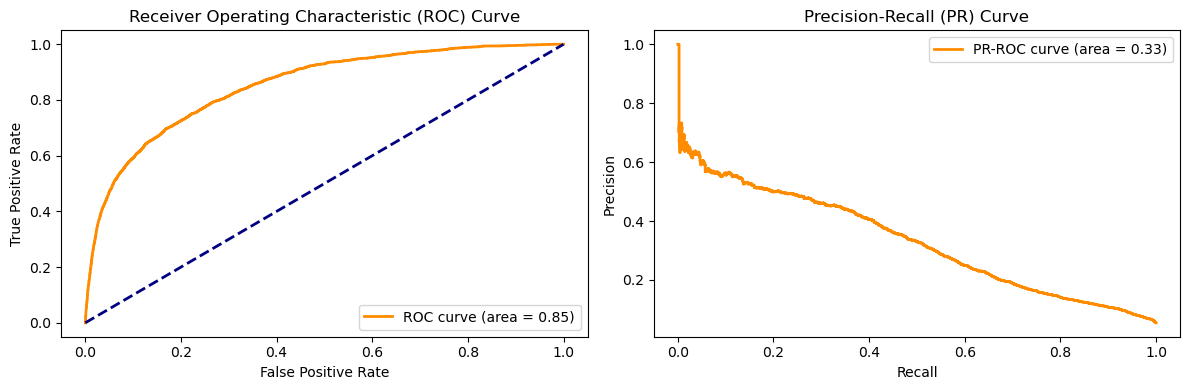

In [60]:
# Function to plot ROC and PR-ROC curves
def plot_roc_pr_curves(model, X_test, y_test):
    # Predict probabilities
    y_probs = model.predict_proba(X_test)[:, 1]

    # Convert labels to binary format
    y_test_binary = label_binarize(y_test, classes=['No', 'Yes'])

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test_binary, y_probs)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')

    # PR-ROC Curve
    precision, recall, _ = precision_recall_curve(y_test_binary, y_probs)
    pr_auc = auc(recall, precision)

    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, color='darkorange', lw=2, label='PR-ROC curve (area = {:.2f})'.format(pr_auc))
    plt.title('Precision-Recall (PR) Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

# Plot ROC and PR-ROC curves for XGBoost model
plot_roc_pr_curves(xgb_model_smote, X_test, y_test)